# Uvod u vestacke neuronske mreze sa Kerasom

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:] 

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anklee boot']

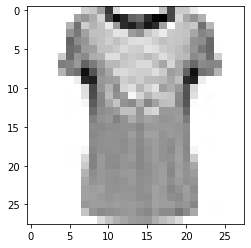

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[1], cmap='binary')

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2022-02-22 19:11:33.882768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 19:11:34.073850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 19:11:34.074081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 19:11:34.074610: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.layers

In [6]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02184594, -0.02261101, -0.03673158, ...,  0.00176495,
         0.01777706,  0.02936248],
       [-0.0513427 ,  0.03707183,  0.07026698, ..., -0.04350982,
         0.0474685 ,  0.00192172],
       [-0.01404224,  0.06753987, -0.06943293, ...,  0.04758557,
        -0.02940413,  0.01205459],
       ...,
       [-0.002331  , -0.01956104,  0.07180093, ...,  0.01679608,
        -0.05816129, -0.03710493],
       [ 0.03752202,  0.02414612, -0.04583811, ..., -0.02952005,
        -0.00054947, -0.00365552],
       [-0.02633374, -0.06331738, -0.06813873, ...,  0.04851275,
         0.00736279,  0.00841624]], dtype=float32)

In [7]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [8]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7096 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5026 - val_sparse_categorical_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4828 - sparse_categorical_accuracy: 0.8318 - val_loss: 0.4424 - val_sparse_categorical_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4388 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4195 - val_sparse_categorical_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4107 - sparse_categorical_accuracy: 0.8552 - val_loss: 0.3939 - val_sparse_categorical_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8615 - val_loss: 0.3757 - val_sparse_categorical_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3755 - spars

(0.0, 1.0)

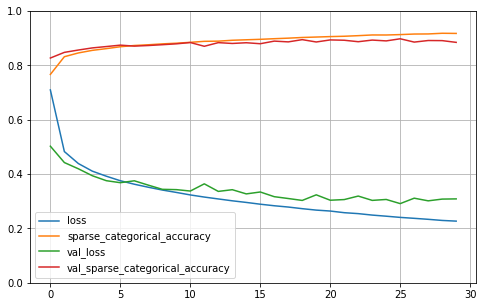

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [10]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2225 - sparse_categorical_accuracy: 0.9205 - val_loss: 0.2945 - val_sparse_categorical_accuracy: 0.8956
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2179 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.2941 - val_sparse_categorical_accuracy: 0.8978
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2149 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.8902
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2115 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.2996 - val_sparse_categorical_accuracy: 0.8932
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2073 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.3000 - val_sparse_categorical_accuracy: 0.8916
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2045 - spars

### Upotreba modela za izracunavanje predvidjanja

In [12]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

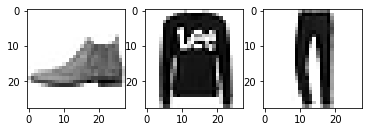

In [17]:
plt.subplot(131)
plt.imshow(X_test[0], cmap='binary')
plt.subplot(132)
plt.imshow(X_test[1], cmap='binary')
plt.subplot(133)
plt.imshow(X_test[2], cmap='binary')

## Izrada regresionog MLP-a pomocu API-ja Sequential

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
scaler = StandardScaler()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [24]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation=keras.activations.relu, input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8448 - val_loss: 0.9135
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5983 - val_loss: 0.4690
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4681 - val_loss: 0.4335
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.4242
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.4128
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4208 - val_loss: 0.4063
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4149 - val_loss: 0.3995
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.4072
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4019 - val_loss: 0.4050
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3973 - val_loss: 0.3967

(0.0, 1.0)

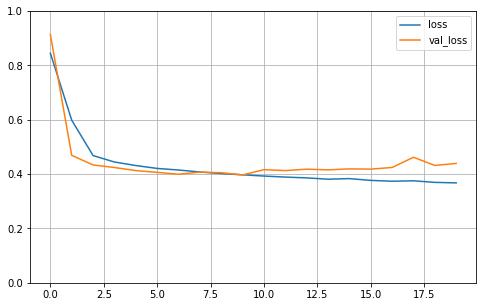

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

## Izrada slozenih modela pomocu API-ja Functional

In [20]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [22]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 2.2385 - val_loss: 0.7215
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6527 - val_loss: 0.6268
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6066 - val_loss: 0.6033
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5840 - val_loss: 0.5823
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5651 - val_loss: 0.5684
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5495 - val_loss: 0.5553
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5370 - val_loss: 0.5442
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5261 - val_loss: 0.5361
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5168 - val_loss: 0.5280
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5094 - val_loss: 0.5206
Epoch 11/2

(0.0, 1.0)

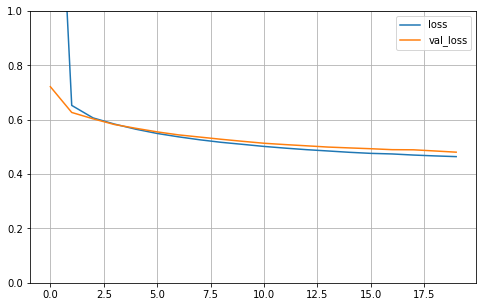

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

## Upotreba API-ja Subclassing za izradu dinamickih modela

In [26]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)
    
  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

## Upis i ucitavanje modela

In [27]:
model.save('my_keras_model.h5')

In [29]:
model = keras.models.load_model('my_keras_model.h5')

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                270       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Upotreba callbacks

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3483 - val_loss: 0.5538
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.5360
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - val_loss: 0.5391
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3416 - val_loss: 0.5657
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3406 - val_loss: 0.5519
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3411 - val_loss: 0.5337
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3377 - val_loss: 0.5661
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3393 - val_loss: 0.5750
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.5534
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3383 - val_loss: 0.5788

## Upotreba TensorBoarda za vizuelizaciju

In [35]:
import os 
root_logdir = '../keras/logs'

def get_run_logdir():
  import time
  run_id = time.strftime('run%Y%m_%d-%H%M%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [39]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
histroy = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=10, callbacks=[tensorboard_cb])

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3342 - val_loss: 0.5762
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3325 - val_loss: 0.5783
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3307 - val_loss: 0.5980
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3472 - val_loss: 0.6469
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3318 - val_loss: 0.6348
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3288 - val_loss: 0.6043
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3300 - val_loss: 0.6205
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3256 - val_loss: 0.6210
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3257 - val_loss: 0.6560
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3276 - val_loss: 0.6930

In [42]:
%load_ext tensorboard
%tensorboard --logdir=../keras/logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9995), started 0:00:32 ago. (Use '!kill 9995' to kill it.)

In [43]:
import numpy as np
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)
    data = (np.random.randn(100) + 2) * step / 100
    tf.summary.histogram('my_hist', data, buckets=50, step=step)
    images = np.random.randn(2, 32, 32, 3)
    tf.summary.image('my_images', images * step / 1000, step=step),
    texts = ['Korak je' + str(step), 'Kvadrat je ' + str(step**2)]
    tf.summary.text('my_text', texts, step=step)
    

## Fino podesavanje hiperparametra neuronskih mreza

In [44]:
def build_model(n_hidden=1, n_neurons=30, lr=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=lr)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [45]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_5287/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [46]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)

Epoch 1/100


/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 1.0863 - val_loss: 0.6877
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6351 - val_loss: 0.5805
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.5333
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5260 - val_loss: 0.4998
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4945 - val_loss: 0.4826
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4784 - val_loss: 0.4752
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4872 - val_loss: 0.4598
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4588 - val_loss: 0.4496
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4541 - val_loss: 0.4432
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4459 - val_loss: 0.4401
E

In [49]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
  'n_hidden': [0, 1, 2, 3, 4],
  'n_neurons': np.arange(1, 100),
  'lr': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [50]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = rnd_search_cv.score(X_test, y_test)

Epoch 1/100


/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.3775 - val_loss: 0.6127
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5710 - val_loss: 0.5389
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5217 - val_loss: 0.4615
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4627 - val_loss: 0.4224
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4336 - val_loss: 0.4065
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4161 - val_loss: 0.3863
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4034 - val_loss: 0.3911
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3946 - val_loss: 0.3799
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3866 - val_loss: 0.3813
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3788 - val_loss: 0.3773
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0329 - val_loss: 0.5689
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5153 - val_loss: 0.4770
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4550 - val_loss: 0.4540
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4230 - val_loss: 0.4153
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4039 - val_loss: 0.4003
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3916 - val_loss: 0.3958
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3847 - val_loss: 0.3916
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3749 - val_loss: 0.3894
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3696 - val_loss: 0.3922
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3631 - val_loss: 0.3883
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0855 - val_loss: 0.6167
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5494 - val_loss: 0.5299
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4742 - val_loss: 0.4831
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4462 - val_loss: 0.4492
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4285 - val_loss: 0.4341
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4167 - val_loss: 0.4332
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4060 - val_loss: 0.4060
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3975 - val_loss: 0.3958
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3899 - val_loss: 0.3898
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3840 - val_loss: 0.3825
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.5336 - val_loss: 4.8608
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 46.6118 - val_loss: 105.5582
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1382.9890 - val_loss: 2869.1877
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 39442.3320 - val_loss: 81922.1016
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1132896.1250 - val_loss: 2582242.0000
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 2007240.0000 - val_loss: 70970160.0000
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 995464064.0000 - val_loss: 2334648576.0000
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 30703294464.0000 - val_loss: 58502725632.0000
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 794747469824.0000 - val_loss: 1726447222784.0000
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3203 - val_loss: 16.8779
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 373.1354 - val_loss: 829.3146
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 21790.0156 - val_loss: 138102.9844
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 3636208.0000 - val_loss: 7267743.0000
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 189220576.0000 - val_loss: 387546272.0000
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 454677184.0000 - val_loss: 19240716288.0000
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 472743608320.0000 - val_loss: 1064428503040.0000
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 45099568332800.0000 - val_loss: 50940207955968.0000
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 70144676069376.0000 

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8698 - val_loss: 0.6964
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5492 - val_loss: 0.6588
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5860 - val_loss: 0.8702
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5831 - val_loss: 0.8279
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6295 - val_loss: 1.4384
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6410 - val_loss: 1.3257
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7685 - val_loss: 2.1020
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8426 - val_loss: 2.5050
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1204 - val_loss: 3.6604
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1796 - val_loss: 4.8513
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8175 - val_loss: 0.5895
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5457 - val_loss: 0.5074
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4887 - val_loss: 0.4856
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4766 - val_loss: 0.5067
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.4451
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4500 - val_loss: 0.4268
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4346 - val_loss: 0.4115
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4317 - val_loss: 0.4181
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4243 - val_loss: 0.4010
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4160 - val_loss: 0.4141
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3474 - val_loss: 0.9063
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5478 - val_loss: 0.5270
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4304 - val_loss: 0.4872
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4026 - val_loss: 0.5133
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3887 - val_loss: 0.5467
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3816 - val_loss: 0.5664
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.5693
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3646 - val_loss: 0.5785
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3594 - val_loss: 0.5769
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3551 - val_loss: 0.5817
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8937 - val_loss: 0.7958
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6325 - val_loss: 1.1723
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6582 - val_loss: 0.4971
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4680 - val_loss: 0.4402
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4480 - val_loss: 0.4312
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4382 - val_loss: 0.4184
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4299 - val_loss: 0.4082
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4281 - val_loss: 0.4120
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4176 - val_loss: 0.4024
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4117 - val_loss: 0.3970
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0866 - val_loss: 0.5811
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5307 - val_loss: 0.4935
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4723 - val_loss: 0.4561
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4442 - val_loss: 0.4320
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4280 - val_loss: 0.4159
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4142 - val_loss: 0.3956
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4065 - val_loss: 0.3906
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3977 - val_loss: 0.3799
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3911 - val_loss: 0.3725
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3841 - val_loss: 0.3814
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.4134 - val_loss: 0.5832
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5480 - val_loss: 0.4822
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4683 - val_loss: 0.4373
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4313 - val_loss: 0.4110
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4079 - val_loss: 0.3999
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3939 - val_loss: 0.4017
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3844 - val_loss: 0.3945
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3744 - val_loss: 0.3857
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3689 - val_loss: 0.3824
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3630 - val_loss: 0.3831
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.1934 - val_loss: 0.6317
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6242 - val_loss: 0.5692
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5601 - val_loss: 0.5207
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5109 - val_loss: 0.4940
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4770 - val_loss: 0.4761
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 0.4582
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4376 - val_loss: 0.4370
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4257 - val_loss: 0.4292
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4176 - val_loss: 0.4170
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4088 - val_loss: 0.4172
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 5ms/step - loss: 1.5403 - val_loss: 0.6938
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6410 - val_loss: 0.5839
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5593 - val_loss: 0.5258
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5083 - val_loss: 0.4856
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4758 - val_loss: 0.4575
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4553 - val_loss: 0.4408
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4399 - val_loss: 0.4242
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4274 - val_loss: 0.4139
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4182 - val_loss: 0.4117
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4103 - val_loss: 0.3995
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.2847 - val_loss: 0.6250
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5805 - val_loss: 0.5523
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5162 - val_loss: 0.4958
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4699 - val_loss: 0.4644
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4404 - val_loss: 0.4361
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4199 - val_loss: 0.4288
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4077 - val_loss: 0.4114
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3966 - val_loss: 0.4101
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3892 - val_loss: 0.3961
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3827 - val_loss: 0.3959
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3424 - val_loss: 0.6724
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6437 - val_loss: 0.5910
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5667 - val_loss: 0.5314
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5105 - val_loss: 0.4887
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4724 - val_loss: 0.4605
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4478 - val_loss: 0.4420
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4312 - val_loss: 0.4257
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4197 - val_loss: 0.4186
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4108 - val_loss: 0.4080
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4051 - val_loss: 0.3969
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.0074 - val_loss: 2.3157
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6611 - val_loss: 1.1874
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9847 - val_loss: 0.8388
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7653 - val_loss: 0.7212
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6861 - val_loss: 0.6763
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6528 - val_loss: 0.6556
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6352 - val_loss: 0.6435
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6235 - val_loss: 0.6343
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6142 - val_loss: 0.6261
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6061 - val_loss: 0.6191
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.1301 - val_loss: 2.5355
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7890 - val_loss: 1.3034
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0644 - val_loss: 0.8937
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8167 - val_loss: 0.7464
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7218 - val_loss: 0.6859
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6776 - val_loss: 0.6559
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6513 - val_loss: 0.6368
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6231
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6169 - val_loss: 0.6119
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6037 - val_loss: 0.6021
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.3749 - val_loss: 2.6712
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8963 - val_loss: 1.3575
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1146 - val_loss: 0.9184
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8446 - val_loss: 0.7557
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7400 - val_loss: 0.6874
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6916 - val_loss: 0.6526
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6637 - val_loss: 0.6308
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6442 - val_loss: 0.6147
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6288 - val_loss: 0.6021
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6159 - val_loss: 0.5914
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6.0447 - val_loss: 4.8618
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 4.1910 - val_loss: 3.4399
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9984 - val_loss: 2.5104
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 2.2185 - val_loss: 1.8976
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 1.7051 - val_loss: 1.4874
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3623 - val_loss: 1.2113
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1315 - val_loss: 1.0232
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9743 - val_loss: 0.8942
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8663 - val_loss: 0.8047
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7913 - val_loss: 0.7421
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 6.9948 - val_loss: 5.8800
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 4.7238 - val_loss: 4.0521
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 3.3093 - val_loss: 2.8953
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 2.4099 - val_loss: 2.1498
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8294 - val_loss: 1.6614
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4492 - val_loss: 1.3377
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1977 - val_loss: 1.1211
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0294 - val_loss: 0.9743
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9153 - val_loss: 0.8737
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8369 - val_loss: 0.8038
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 7.2476 - val_loss: 5.6624
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 4.8656 - val_loss: 3.9074
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 3.3920 - val_loss: 2.7963
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 2.4565 - val_loss: 2.0775
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 1.8509 - val_loss: 1.6037
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4525 - val_loss: 1.2874
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1872 - val_loss: 1.0735
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0082 - val_loss: 0.9272
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8864 - val_loss: 0.8266
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8026 - val_loss: 0.7563
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 3.1490 - val_loss: 1.0772
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8716 - val_loss: 0.6616
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6422 - val_loss: 0.6191
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6027 - val_loss: 0.5956
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5828 - val_loss: 0.5810
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5669 - val_loss: 0.5692
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5554 - val_loss: 0.5616
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5465 - val_loss: 0.5532
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5393 - val_loss: 0.5480
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5340 - val_loss: 0.5439
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.9233 - val_loss: 1.0743
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8156 - val_loss: 0.6795
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6475 - val_loss: 0.6189
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6006 - val_loss: 0.5908
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5730 - val_loss: 0.5733
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5535 - val_loss: 0.5601
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5388 - val_loss: 0.5510
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5278 - val_loss: 0.5449
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5194 - val_loss: 0.5394
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5135 - val_loss: 0.5350
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.9173 - val_loss: 1.0926
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7820 - val_loss: 0.6860
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6152
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5982 - val_loss: 0.5857
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5783 - val_loss: 0.5698
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5647 - val_loss: 0.5596
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5547 - val_loss: 0.5526
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5474 - val_loss: 0.5481
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5420 - val_loss: 0.5428
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5378 - val_loss: 0.5396
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.0819 - val_loss: 5.7795
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 6.4528 - val_loss: 607.8739
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 824.7357 - val_loss: 87953.8203
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 170304.1094 - val_loss: 12876086.0000
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 21892864.0000 - val_loss: 1891212928.0000
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 5015279616.0000 - val_loss: 278624763904.0000
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 6336286818304.0000 - val_loss: 42838641344512.0000
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 991419246313472.0000 - val_loss: 6079581505191936.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 170848748153339904.

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 55.7688 - val_loss: 281.6794
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 15821.0820 - val_loss: 167413.5000
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 968840.8125 - val_loss: 100086984.0000
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 4500784640.0000 - val_loss: 60461408256.0000
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 5822534909952.0000 - val_loss: 36397104758784.0000
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 3453811909722112.0000 - val_loss: 22268031040225280.0000
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 219165274807468032.0000 - val_loss: 13175020125616603136.0000
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 554012946988888227840.0000 - val_loss: 8020585551273775857664.0000
Epoch 9/100
242/242 [======

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 0.8056 - val_loss: 0.5588
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5467 - val_loss: 0.5568
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5276 - val_loss: 0.5637
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5502 - val_loss: 0.6831
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5429 - val_loss: 0.9914
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6894 - val_loss: 3.4106
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1621 - val_loss: 10.2978
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 2.9379 - val_loss: 39.1308
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 9.5939 - val_loss: 130.8551
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 31.4311 - val_loss: 470

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 6.0589 - val_loss: 3.8622
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9012 - val_loss: 2.2567
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8310 - val_loss: 1.6018
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3661 - val_loss: 1.2646
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1075 - val_loss: 1.0492
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9391 - val_loss: 0.9054
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8325 - val_loss: 0.8113
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7656 - val_loss: 0.7502
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7247 - val_loss: 0.7114
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6991 - val_loss: 0.6864
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.3180 - val_loss: 2.9730
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 2.2374 - val_loss: 1.6731
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4121 - val_loss: 1.2429
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1400 - val_loss: 1.0857
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0183 - val_loss: 0.9902
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9373 - val_loss: 0.9170
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8740 - val_loss: 0.8566
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8226 - val_loss: 0.8072
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7806 - val_loss: 0.7661
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7460 - val_loss: 0.7325
E

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 4.6576 - val_loss: 3.4665
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 2.7952 - val_loss: 2.1667
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7950 - val_loss: 1.4854
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3054 - val_loss: 1.1948
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1076 - val_loss: 1.0757
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0241 - val_loss: 1.0103
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9757 - val_loss: 0.9643
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9417 - val_loss: 0.9284
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9158 - val_loss: 0.8996
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8954 - val_loss: 0.8742
E

In [53]:
rnd_search_cv.best_score_

-0.334478755791982